# **Title**    - Content based Recommendation system using NLP and Cluster analysis



##### **Project Type**    - Unsupervised ML
##### **Contribution**    - Individual
##### **Member Name** - Sridevi V


# **Project Summary**

Contemporary streaming services, such as Netflix, must deal with the dilemma of facilitating the process of finding content that would be of importance and interest to the user in the face of excessive saturation of entertainment presentation in the form of shows and movies. This challenge can be handled through a formidable recommender system that personalizes the viewing process and maintains the interest of the user. This project is the construction of a content-based show recommendation system in Netflix to recommend Netflix shows that are similar to the past favourites of a user with regard to aspects such as content metadata. Although preliminary tests included methods of cluster formation to group the content with its unsupervisory characteristics, the ultimate solution was focused on content-based filtering, which resulted in the superior relevancy and precision when coming up with the recommendations.

The issue that is to be resolved in this project is related to the absence of personalized navigation in a large library of content. Consumers tend to have problems in locating items that match their interests, thus becoming more inclined to churning more or losing interest. As an answer to this, the project develops the recommender system whose components can employ the inherent characteristics of shows namely title, director, cast, genre, country, and description to aid in recommending shows of the same nature. The model does not use user rating scores or even collaborative filtering considerations but instead recommends in the following manner: the closer the content of shows are to each other based on the similarity equation using the Natural Language Processing (NLP) and vector similarity.

The first stage of the project was the preparation and cleaning of Netflix dataset. Such columns as director, cast, country, genre, and description were chosen because they have the potential to characterize the thematic and style characteristics of shows. All these columns were subjected to a set of preprocessing NLP operations such as: lowercasing, removal of punctuations, removal of stopwords, tokenization and lemmatization. All the attributes were gathered into a single feature space after the preprocessing phase named clustering_attributes helping the two methods, clustering and content-based filtering, to read as an input.K-Means and Hierarchical Clustering were clustering analyses conducted to determine how shows may be grouped using their similar properties. Although this aided in the learning process of how shows organically group, it had not provided the desired ends of what the recommendation quality or business effect could achieve. Thus, clustering was applied more so to help in the analysis of data rather than form the basis of the recommender model.

The last content-based filtering model was put into practice utilizing CountVectorizer that would transform the combined feature space into a token count matrix. Then a measure of cosine similarity between the shows in this high-dimensional space was carried out. Given a particular show title as input, the recommender will suggest the 10 most similar shows by use of the cosine similarity score. This is a commonsense, scalable, and highly relevant technique that works based on former watch history of the user.
To ensure greater reusability of the model, CountVectorizer, cosine similarity matrix would be serialized with the pickle module provided in Python. This can be used to index the data so that efficient loading operations and real time recommendations can be performed with no retraining or recomputation of the similarity score each time.

In conclusion, this project successfully demonstrates how content-based filtering, powered by NLP and similarity metrics, can provide meaningful and personalized recommendations to users. While clustering added value in terms of understanding content groupings, the content-based approach proved more effective for practical deployment. This solution is particularly suited for platforms with limited user data or new users (cold-start problem), as it relies solely on content features. Future improvements could involve incorporating user preferences, ratings, or review sentiments to move toward a more holistic hybrid model—provided that it offers better accuracy than the current solution.



# **GitHub Link**

https://github.com/Sridevivaradharajan

# **Problem Statement**


* Overwhelming Content Choices: Users often face difficulty in finding relevant shows on Netflix due to the vast and growing library of content.
* Limitations of Traditional Systems: Techniques like collaborative filtering and clustering suffer from issues such as data sparsity and cold-start problems, reducing recommendation accuracy.
* Need for Content-Based Filtering: A content-based recommendation system using NLP techniques and show metadata (like genre, cast, and description) can offer more accurate, personalized suggestions without relying on user ratings.

# **Let's Begin !**

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import re                          
import string     
import matplotlib.pyplot as plt      
import seaborn as sns         
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\varad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\varad\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Dataset Loading

In [2]:
# Load Dataset
data_net=pd.read_csv('Netflix/NETFLIX MOVIES AND TV SHOWS CLUSTERING (1).csv')

### Dataset First View

In [3]:
# Dataset First Look
data_net.head(10)

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   
5      s6  TV Show     46        Serdar Akar   
6      s7    Movie    122    Yasir Al Yasiri   
7      s8    Movie    187     Kevin Reynolds   
8      s9    Movie    706      Shravan Kumar   
9     s10    Movie   1920       Vikram Bhatt   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
5  Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...         Turkey   
6  Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...          Egypt   
7  Samuel L. Jackson, John Heard, Kelly Rowan, Cl...  United States   
8  Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...          India   
9  Rajneesh Duggal, Adah Sharma, Indraneil Sengup...          India   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   
5       July 1, 2017          2016  TV-MA   1 Season   
6       June 1, 2020          2019  TV-MA     95 min   
7   November 1, 2019          1997      R    119 min   
8      April 1, 2019          2019  TV-14    118 min   
9  December 15, 2017          2008  TV-MA    143 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   
5    International TV Shows, TV Dramas, TV Mysteries   
6                Horror Movies, International Movies   
7                                             Dramas   
8                Horror Movies, International Movies   
9     Horror Movies, International Movies, Thrillers   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...  
5  A genetics professor experiments with a treatm...  
6  After an awful accident, a couple admitted to ...  
7  After one of his high school students attacks ...  
8  When a doctor goes missing, his psychiatrist w...  
9  An architect and his wife move into a castle t...

### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
# Dataset shape
rows, cols = data_net.shape
print("Number of rows:", rows)
print("Number of columns:", cols)

Number of rows: 7787
Number of columns: 12


### Dataset Information

In [5]:
# Dataset Info
# Dataset info
data_net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
# Check for duplicate rows
duplicate_rows = data_net.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

# Remove duplicates if any
data_net = data_net.drop_duplicates()

Number of duplicate rows: 0


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
# Checking for missing/null values
null_counts = data_net.isnull().sum()
print("Missing values in each column:\n")
print(null_counts)

Missing values in each column:

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


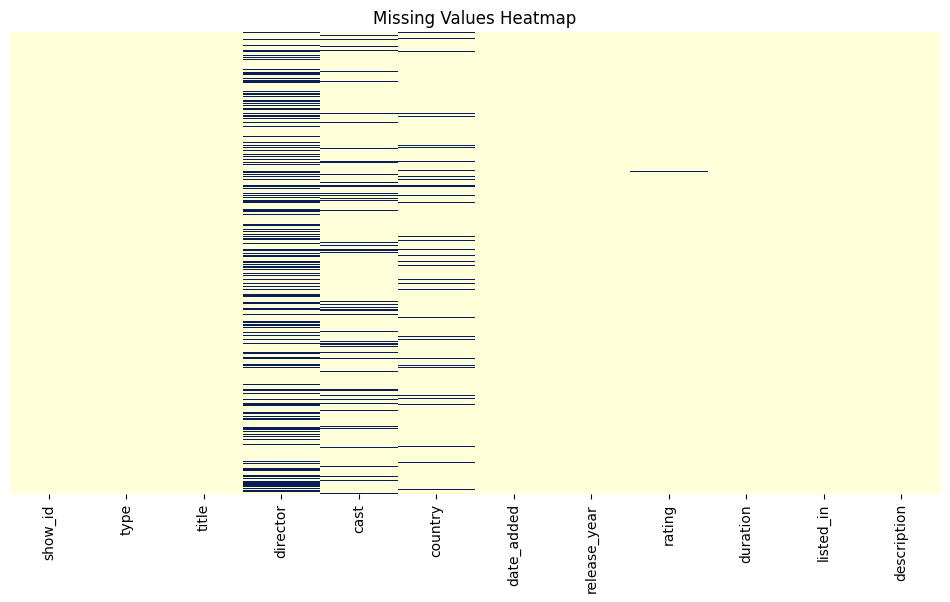

            Missing Values  % of Total
director              2389   30.679337
cast                   718    9.220496
country                507    6.510851
date_added              10    0.128419
rating                   7    0.089893


In [8]:
# Visualizing the missing values
plt.figure(figsize=(12, 6))
sns.heatmap(data_net.isnull(), cbar=False, cmap='YlGnBu', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

# Display count and percentage of missing values
missing_info = data_net.isnull().sum().to_frame(name='Missing Values')
missing_info['% of Total'] = (missing_info['Missing Values'] / len(data_net)) * 100
missing_info = missing_info[missing_info['Missing Values'] > 0]
print(missing_info.sort_values(by='Missing Values', ascending=False))

### What did you know about your dataset?

Loaded the Netflix dataset and explored its structure using functions like .head(), .shape, and .info() to understand the number of rows and columns, as well as the data types of each field. I checked for duplicate records using .duplicated().sum() and also analyzed missing or null values with .isnull().sum(). To better visualize these missing values, I used a heatmap which clearly showed where the dataset had gaps. These steps gave me a clear understanding of the overall data quality, allowing me to plan for necessary preprocessing in the next stages. From this initial exploration, I now have a solid idea of the dataset's structure and the areas that need attention.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
data_net.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
# Dataset Describe
data_net.select_dtypes(include='number').describe()


release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000

### Variables Description

| **Column Name** | **Description**                                                                             |
| --------------- | ------------------------------------------------------------------------------------------- |
| `show_id`       | Unique ID for every Movie/Tv show. |
| `type`          | Whether the content is a **Movie** or **TV Show**.                                          |
| `title`         | Name of the show/movie.                                                                     |
| `director`      | Name of the directors.                                            |
| `cast`          | Lead actors/actresses involved in the show..                   |
| `country`       | Country where the show/movie was produced.                                                  |
| `date_added`    | Date when the content was added to Netflix.                                                 |
| `release_year`  | The year the show/movie was released.          |
| `rating`        | TV/Movie rating. Indicates age suitability.                            |
| `duration`      | Length of the content — either in minutes (for movies) or number of seasons (for shows).    |
| `listed_in`     | Genres.                                          |
| `description`   | A short summary of the show/movie content.                                                  |


### Check Unique Values for each variable.

In [11]:
# Check unique values for each variable
data_net.nunique()


show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Handling the missing values
data_net[['director','cast','country']] = data_net[['director','cast','country']].fillna('Unknown')
data_net['rating'] = data_net['rating'].fillna(data_net['rating'].mode()[0])
data_net.dropna(axis=0, inplace = True)

In [13]:
data_net.shape

(7777, 12)

In [14]:
# Top countries
data_net.country.value_counts()

country
United States                                                   2549
India                                                            923
Unknown                                                          506
United Kingdom                                                   396
Japan                                                            225
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: count, Length: 682, dtype: int64

In [15]:
# Genre of shows
data_net.listed_in.value_counts()

listed_in
Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Anime Series, Crime TV Shows, TV Thrillers                                           1
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: count, Length: 491, dtype: 

In [16]:
# Choosing the primary country and primary genre to simplify the analysis
data_net['country'] = data_net['country'].apply(lambda x: x.split(',')[0])
data_net['listed_in'] = data_net['listed_in'].apply(lambda x: x.split(',')[0])

In [17]:
# contry in which a movie was produced
data_net.country.value_counts()

country
United States     2877
India              956
United Kingdom     576
Unknown            506
Canada             259
                  ... 
Zimbabwe             1
Namibia              1
Soviet Union         1
Iran                 1
Somalia              1
Name: count, Length: 82, dtype: int64

In [18]:
# genre of shows
data_net.listed_in.value_counts()

listed_in
Dramas                          1384
Comedies                        1074
Documentaries                    751
Action & Adventure               721
International TV Shows           689
Children & Family Movies         502
Crime TV Shows                   369
Kids' TV                         357
Stand-Up Comedy                  321
Horror Movies                    244
British TV Shows                 231
Docuseries                       193
Anime Series                     147
International Movies             114
TV Comedies                      109
Reality TV                       102
Classic Movies                    77
TV Dramas                         62
Movies                            56
Thrillers                         49
TV Action & Adventure             36
Stand-Up Comedy & Talk Shows      33
Romantic TV Shows                 28
Independent Movies                20
Anime Features                    19
Classic & Cult TV                 19
Music & Musicals            

In [19]:
# Splitting the duration column, and changing the datatype to integer
data_net['duration'] = data_net['duration'].apply(lambda x: int(x.split()[0]))

In [20]:
# Number of seasons for tv shows
data_net[data_net['type']=='TV Show'].duration.value_counts()

duration
1     1608
2      378
3      183
4       86
5       57
6       30
7       19
8       18
9        8
10       5
11       2
12       2
15       2
13       1
16       1
Name: count, dtype: int64

In [21]:
# Movie length in minutes
data_net[data_net['type']=='Movie'].duration.unique()

array([ 93,  78,  80, 123,  95, 119, 118, 143, 103,  89,  91, 149, 144,
       124,  87, 110, 128, 117, 100,  84,  99,  90, 102, 104, 105,  56,
       125,  81,  97, 106, 107, 109,  44,  75, 101,  37, 113, 114, 130,
        94, 140, 135,  82,  70, 121,  92, 164,  53,  83, 116,  86, 120,
        96, 126, 129,  77, 137, 148,  28, 122, 176,  85,  22,  68, 111,
        29, 142, 168,  21,  59,  20,  98, 108,  76,  26, 156,  30,  57,
       150, 133, 115, 154, 127, 146, 136,  88, 131,  24, 112,  74,  63,
        38,  25, 174,  60, 153, 158, 151, 162,  54,  51,  69,  64, 147,
        42,  79,  40,  45, 172,  10, 163,  55,  72,  61,  71, 160, 171,
        48, 139, 157,  15,  65, 134, 161,  62, 186,  49,  73,  58, 165,
       166, 138, 159, 141, 132,  52,  67,  34,  66, 312, 180,  47, 155,
        14, 177,  11,   9,  46, 145,   8,  12,  43,  50,  23, 185, 200,
       169,  27, 170, 196,  33, 181, 204,  32,  35, 167, 179, 193,  13,
       214,  17, 173, 192, 209, 187,  41, 182, 224, 233, 189, 15

In [22]:
# datatype of duration
data_net.duration.dtype

dtype('int64')

In [23]:
# Strip whitespace and convert to datetime
data_net["date_added"] = pd.to_datetime(data_net["date_added"].str.strip(), errors='coerce')

In [24]:
# first and last date on which a show was added on Netflix
data_net.date_added.min(),data_net.date_added.max()

(Timestamp('2008-01-01 00:00:00'), Timestamp('2021-01-16 00:00:00'))

In [25]:
# Adding new attributes month and year of date added
data_net['month_added'] = data_net['date_added'].dt.month
data_net['year_added'] = data_net['date_added'].dt.year
data_net.drop('date_added', axis=1, inplace=True)

<Axes: xlabel='rating', ylabel='count'>

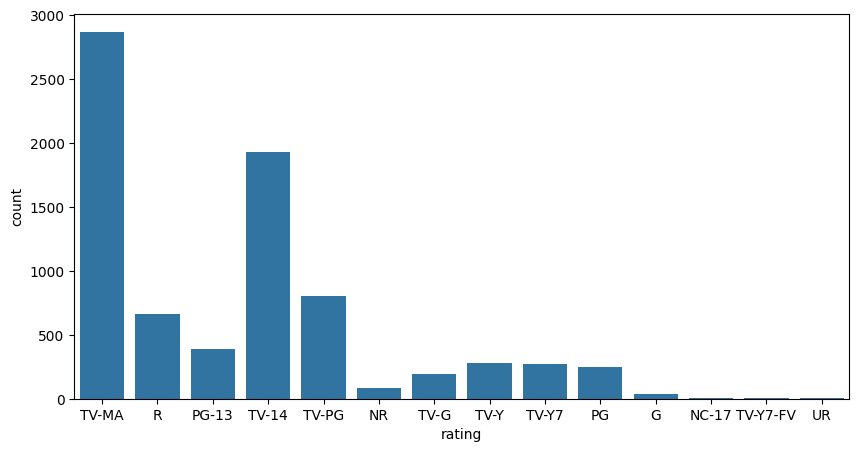

In [26]:
# Age ratings for shows in the dataset
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data=data_net)

In [27]:
# Age ratings
data_net.rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [28]:
# Changing the values in the rating column
rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}

data_net['rating'].replace(rating_map, inplace = True)
data_net['rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

<Axes: xlabel='rating', ylabel='count'>

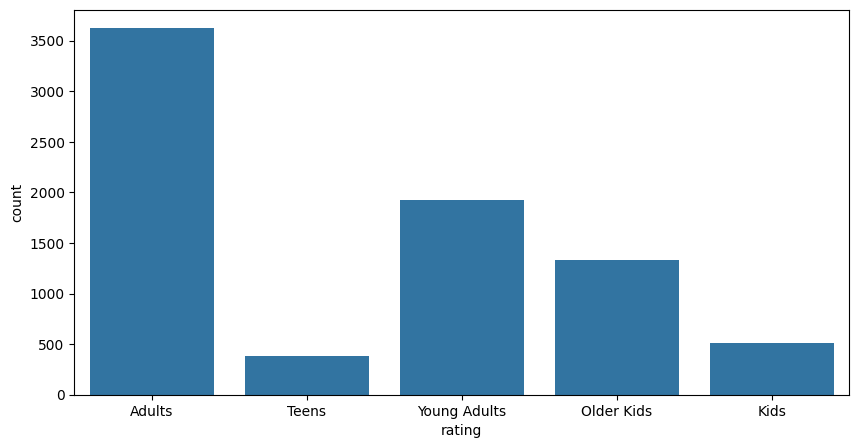

In [29]:
# Age ratings for shows in the dataset
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data=data_net)

In [30]:
# Check missing values again
print("Missing values:\n", data_net.isnull().sum())


Missing values:
 show_id         0
type            0
title           0
director        0
cast            0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
month_added     0
year_added      0
dtype: int64


### What all manipulations have you done and insights you found?

Firstly, I performed data cleaning by handling missing values in fields such as director, cast, and country by filling them with "Unknown". For the rating column, I filled the missing values using the mode. I then identified the top countries and top genres and focused on the primary country and genre for better understanding. Next, I split the duration column to convert it into an integer format for further analysis. I also added two new fields month\_added and year\_added by extracting information from the date\_added column. Finally, I visualized the distribution of content ratings and observed that adult rating content was the most common, followed by young adults, older kids, and kids categories.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## Univariate analysis

Text(0.5, 1.0, 'Movies and TV Shows in the dataset')

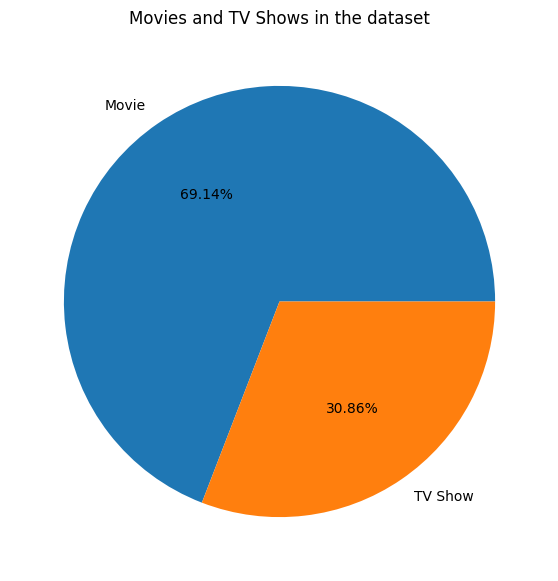

In [31]:
# Number of Movies and TV Shows in the dataset
plt.figure(figsize=(7,7))
data_net.type.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.ylabel('')
plt.title('Movies and TV Shows in the dataset')

##### 1. Why did you pick the specific chart?

A pie chart is ideal for showing proportional distribution, which makes it perfect for comparing the share of Movies vs TV Shows in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The pie chart reveals the dominance of movies over TV shows on the platform highlighting how content type is distributed.

##### 3. Will the gained insights help creating a positive business impact?

Understanding the dominant content type helps content strategists make data backed decisions whether to increase TV show content or focus more on movies to match viewer trends.

Text(0.5, 1.0, 'Top 10 directors by number of shows directed')

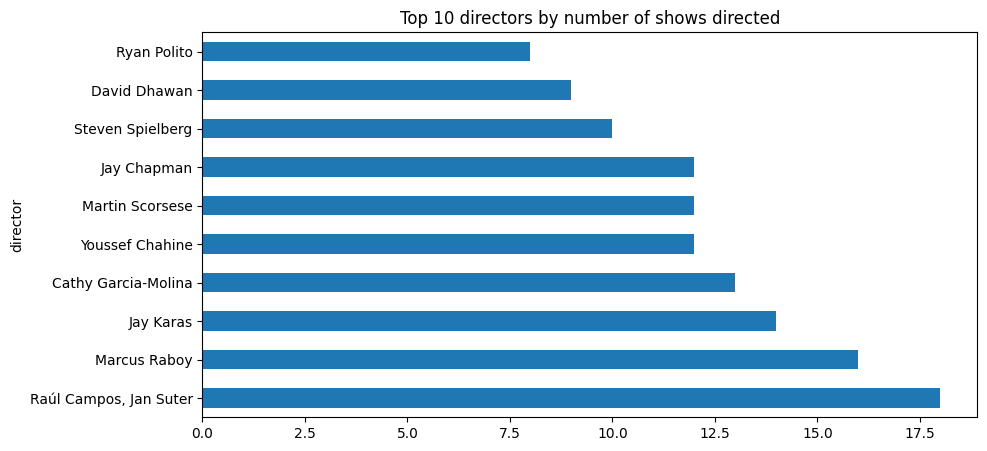

In [32]:
# Top 10 directors in the dataset
plt.figure(figsize=(10,5))
data_net[~(data_net['director']=='Unknown')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 directors by number of shows directed')

##### 1. Why did you pick the specific chart?

A horizontal bar chart effectively displays categorical data with director names, making comparisons clearer and more readable.

##### 2. What is/are the insight(s) found from the chart?

The chart identifies the most prolific directors on the platform. This helps understand which creators are most active or successful in producing content for Netflix.

##### 3. Will the gained insights help creating a positive business impact?

Netflix can leverage partnerships with these top directors or promote their shows to increase viewership and customer retention.

Text(0.5, 1.0, ' Top 10 countries with the highest number of shows')

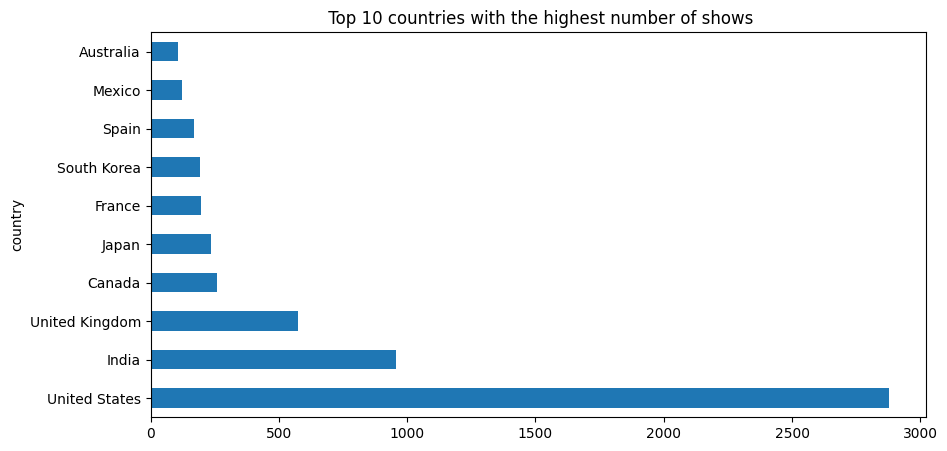

In [33]:
# Top 10 countries with the highest number movies / TV shows in the dataset
plt.figure(figsize=(10,5))
data_net[~(data_net['country']=='Unknown')].country.value_counts().nlargest(10).plot(kind='barh')
plt.title(' Top 10 countries with the highest number of shows')

##### 1. Why did you pick the specific chart?

The horizontal bar chart allows for easy visual ranking of countries by content volume, especially useful when country names vary in length.

##### 2. What is/are the insight(s) found from the chart?

It shows which countries contribute the most content. This helps in understanding the geographical diversity of Netflix’s content library.

##### 3. Will the gained insights help creating a positive business impact?

It supports localization strategies and helps Netflix identify which regions to invest more in for content production or licensing.

Text(0.5, 1.0, 'distribution by released year')

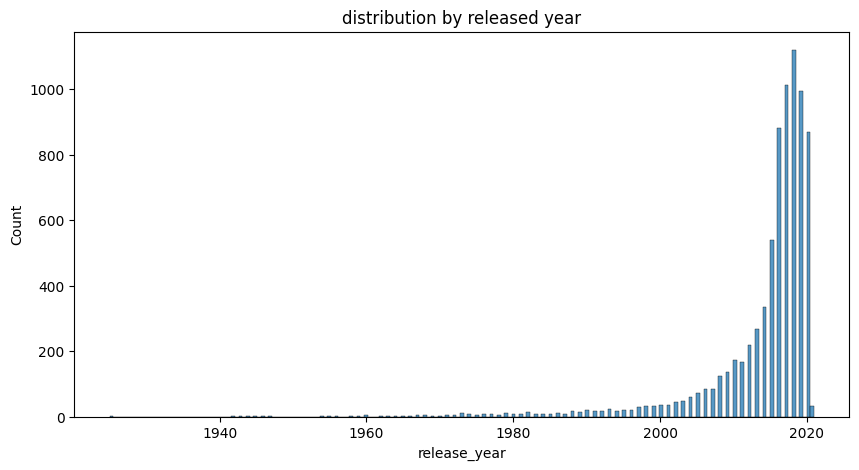

In [34]:
# Visualizing the year in which the movie / tv show was released
plt.figure(figsize=(10,5))
sns.histplot(data_net['release_year'])
plt.title('distribution by released year')

##### 1. Why did you pick the specific chart?

A histogram is ideal for viewing the distribution of numerical values over intervals perfect for understanding how content is spread across years.

##### 2. What is/are the insight(s) found from the chart?

The chart shows content trends over time, such as peaks in production during certain years or shifts in release strategies.

##### 3. Will the gained insights help creating a positive business impact?

Historical trends help in forecasting future demand, identifying content gaps, and planning content renewal cycles.

Text(0.5, 1.0, 'Top 10 genres')

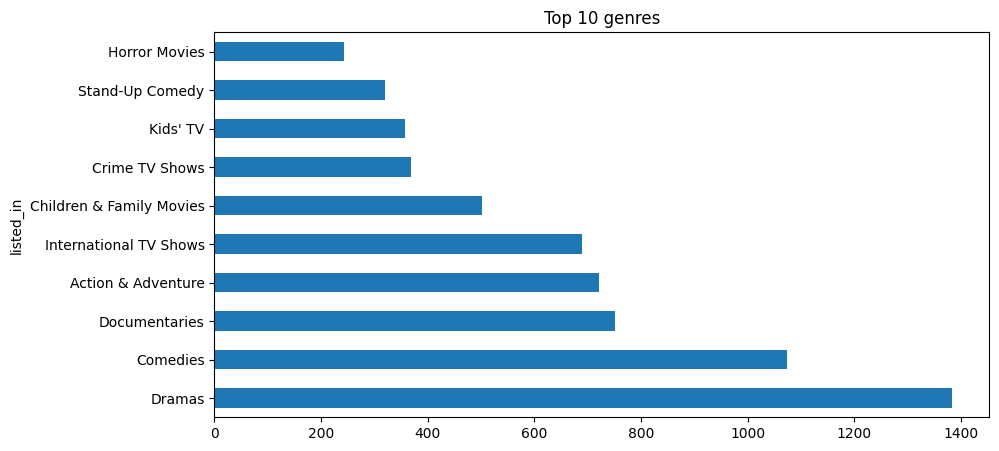

In [35]:
# Top 10 genres 
plt.figure(figsize=(10,5))
data_net.listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres')

##### 1. Why did you pick the specific chart?

Bar charts clearly show frequency comparisons among genres, making it easy to identify which genres dominate.

##### 2. What is/are the insight(s) found from the chart?

It reveals the most common genres available, offering a snapshot of audience preferences and platform specialization.

##### 3. Will the gained insights help creating a positive business impact?

These insights help tailor content recommendations, marketing efforts, and genre-specific promotions to align with viewer interests.

## Bivariate analysis

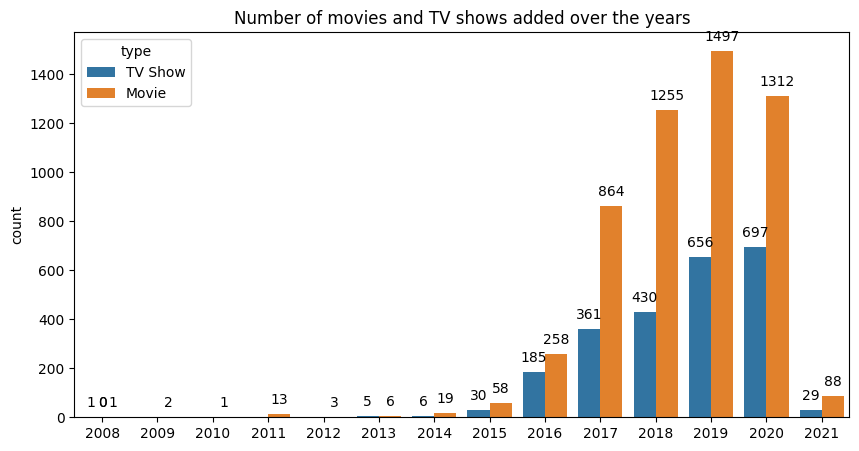

In [36]:
# Number of movies and TV shows added over the years
plt.figure(figsize=(10,5))
p = sns.countplot(x='year_added',data=data_net, hue='type')
plt.title('Number of movies and TV shows added over the years')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

##### 1. Why did you pick the specific chart?

Illustrates how content addition evolved over time.

##### 2. What is/are the insight(s) found from the chart?

Netflix ramped up content additions after 2015.

##### 3. Will the gained insights help creating a positive business impact?

Helps with forecasting and resource allocation for future content onboarding.

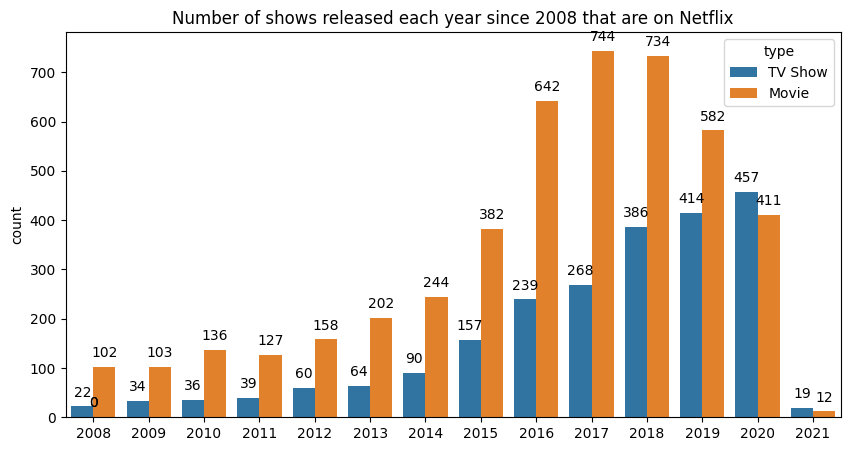

In [37]:
# Number of shows released each year since 2008
order = range(2008,2022)
plt.figure(figsize=(10,5))
p = sns.countplot(x='release_year',data=data_net, hue='type',
                  order = order)
plt.title('Number of shows released each year since 2008 that are on Netflix')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

##### 1. Why did you pick the specific chart?

Evaluates release trends over time for both types.

##### 2. What is/are the insight(s) found from the chart?

TV shows and movies both grew steadily, peaking around 2017.

##### 3. Will the gained insights help creating a positive business impact?

Assists in evaluating the historical impact of production and acquisition strategy.

Text(0.5, 1.0, 'Movie duration distribution')

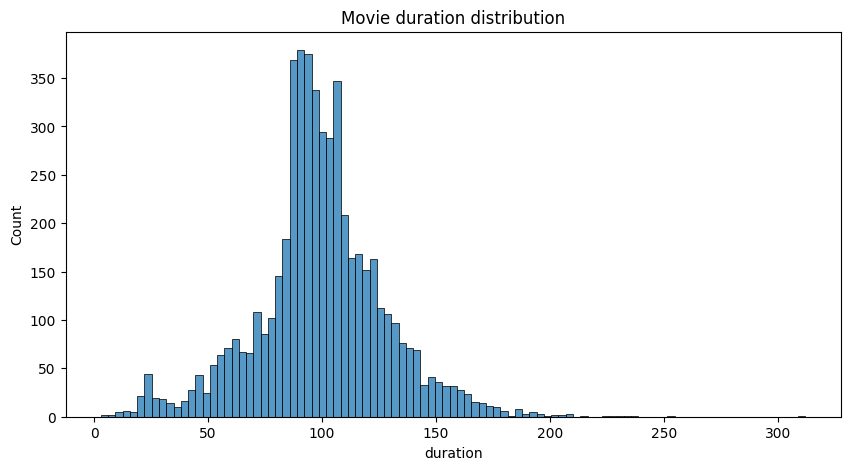

In [38]:
# length of movie analysis
plt.figure(figsize=(10,5))
sns.histplot(x='duration',data=data_net[data_net['type']=='Movie'])
plt.title('Movie duration distribution')

##### 1. Why did you pick the specific chart?

Understands length preferences of movie content.

##### 2. What is/are the insight(s) found from the chart?

Most movies cluster around 90–120 minutes.

##### 3. Will the gained insights help creating a positive business impact?

Helps in aligning production lengths with viewer attention spans and preferences.

Text(0.5, 0, 'Year')

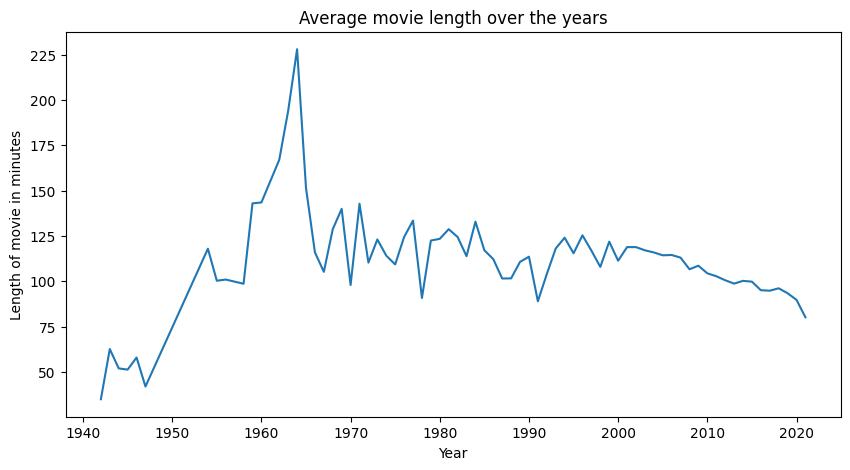

In [39]:
# Average movie length over the years
plt.figure(figsize=(10,5))
data_net[data_net['type']=='Movie'].groupby('release_year')['duration'].mean().plot(kind='line')
plt.title('Average movie length over the years')
plt.ylabel('Length of movie in minutes')
plt.xlabel('Year')

##### 1. Why did you pick the specific chart?

Tracks evolution in movie length.

##### 2. What is/are the insight(s) found from the chart?

Slight fluctuations but mostly stable over time.

##### 3. Will the gained insights help creating a positive business impact?

Ensures new content matches audience comfort with average viewing duration.

Text(0.5, 1.0, 'Top 10 genres for movies')

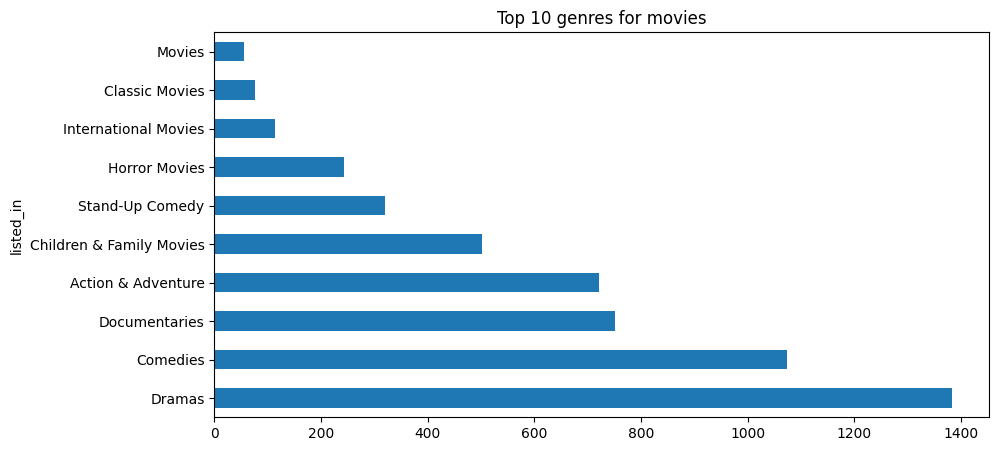

In [40]:
# Top 10 genre for movies
plt.figure(figsize=(10,5))
data_net[data_net['type']=='Movie'].listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres for movies')

##### 1. Why did you pick the specific chart?

Isolates most common movie genres.

##### 2. What is/are the insight(s) found from the chart?

Dramas, Comedies, and documentaries dominate.

##### 3. Will the gained insights help creating a positive business impact?

Informs marketing and acquisition of movie rights by popular genre.

Text(0.5, 1.0, 'Top 10 genres for TV Shows')

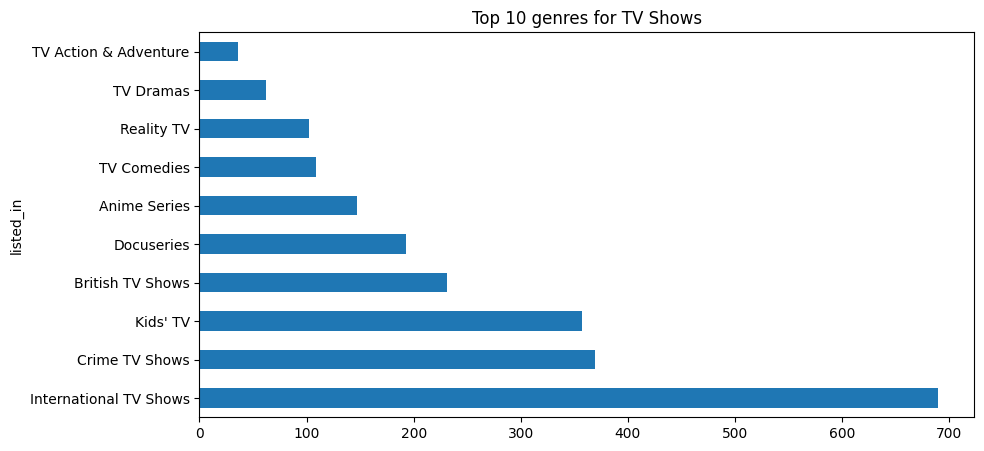

In [41]:
# Top 10 genre for tv shows
plt.figure(figsize=(10,5))
data_net[data_net['type']=='TV Show'].listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres for TV Shows')

##### 1. Why did you pick the specific chart?

Isolates most common TV show genres.

##### 2. What is/are the insight(s) found from the chart?

International TV shows, Kid's TV, and Crime TV shows are popular.

##### 3. Will the gained insights help creating a positive business impact?

Supports decisions for regional content and TV show investments.

## Mutlivariate nalysis

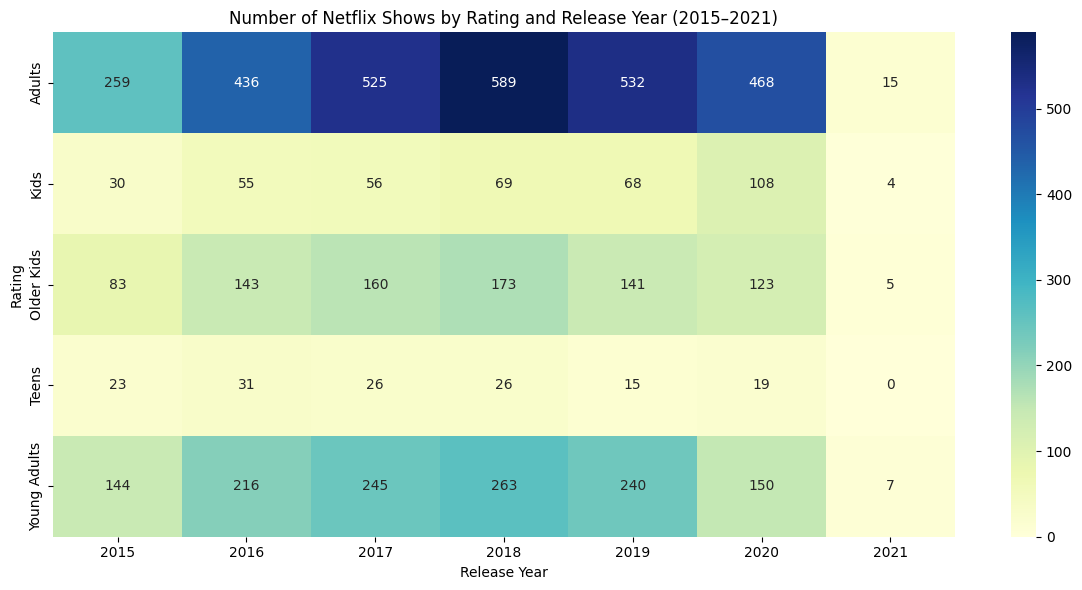

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter to a recent range for readability
data_filtered = data_net[data_net['release_year'].between(2015, 2021)]

# Create pivot table: counts of type by rating and release_year
pivot_table = data_filtered.pivot_table(
    index='rating',
    columns='release_year',
    values='type',
    aggfunc='count',
    fill_value=0
)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Number of Netflix Shows by Rating and Release Year (2015–2021)')
plt.xlabel('Release Year')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

* The heatmap was chosen because it provides a clear and comparative view of how content for different rating categories (Kids, Teens, Adults, etc.) evolved over recent years.
* This multivariate representation (rating vs. release year) is ideal for identifying patterns and shifts in content distribution.

##### 2. What is/are the insight(s) found from the chart?

* There is a consistent dominance of content targeted at Adults, peaking in 2018.
* A gradual increase is noted in content for Young Adults and Older Kids until 2018, after which there's a visible decline by 2021.
* Content for Teens and Kids remains relatively low and stable across the years.
* A major drop is observed in 2021 across all categories, indicating reduced releases possibly due to production delays (e.g., COVID-19 impact).

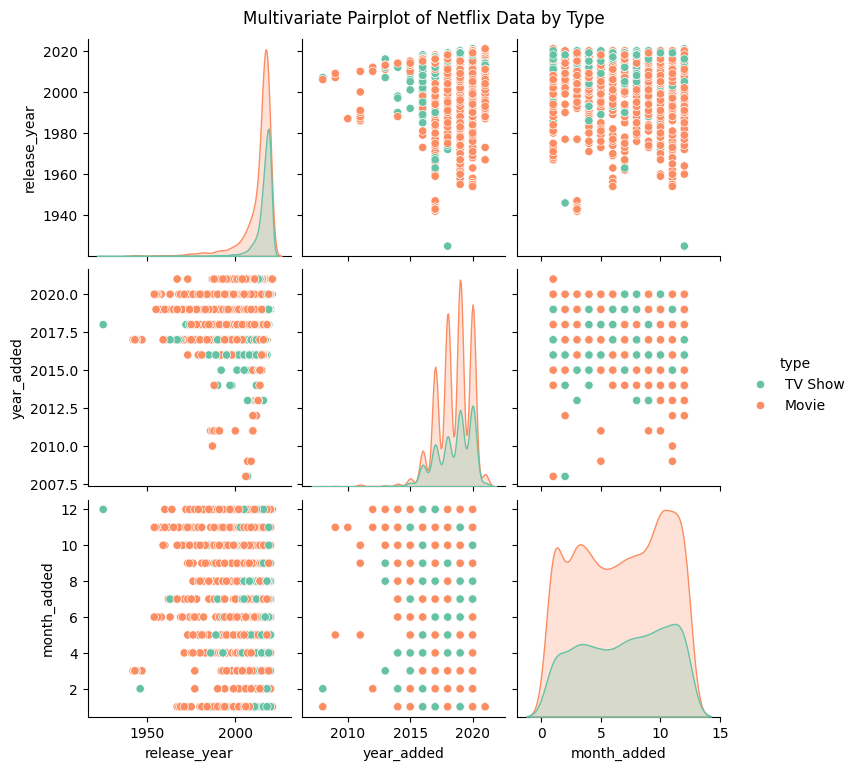

In [43]:
sns.pairplot(data_net[['release_year', 'year_added', 'month_added', 'type']], hue='type', palette='Set2')
plt.suptitle("Multivariate Pairplot of Netflix Data by Type", y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

* The pairplot is ideal for exploring the multivariate relationships across key variables such as release_year, year_added, and month_added, segmented by content type (Movies vs. TV Shows).
* It allows visual detection of distribution trends and potential correlations.

##### 2. What is/are the insight(s) found from the chart?

* TV shows and movies follow a similar upward trend in being added to the platform after 2015.
* Movies show a broader historical spread in release_year, some dating back decades, while most TV shows are more recent.
* Monthly additions tend to follow a seasonal pattern, indicating possible release strategies or viewer behavior preferences.

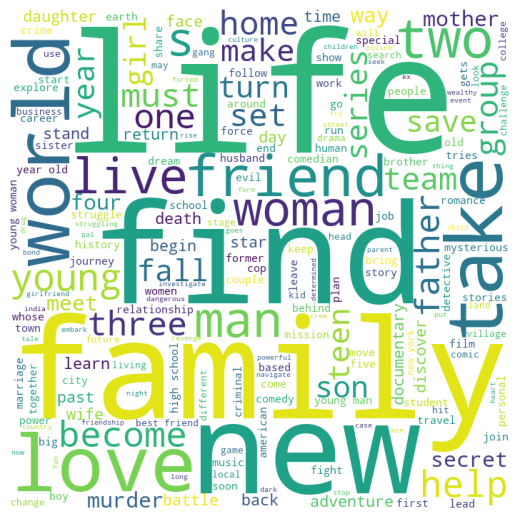

In [44]:
# Building a wordcloud for the movie descriptions
from wordcloud import STOPWORDS
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in data_net.description.values:
    
    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()
    
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)


# plot the WordCloud image                      
plt.figure(figsize = (10,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): There is no difference in the average release year across different content types (e.g., Movie vs. TV Show).

Alternative Hypothesis (H₁): There is a significant difference in the average release year between different content types.

#### 2. Perform an appropriate statistical test.

In [45]:
from scipy.stats import f_oneway

# Example: Test for 3 different years (expandable)
movies = data_net[data_net['type'] == 'Movie']
group1 = movies[movies['release_year'] == 2010]['duration']
group2 = movies[movies['release_year'] == 2015]['duration']
group3 = movies[movies['release_year'] == 2020]['duration']

# Perform ANOVA
f_stat, p_val = f_oneway(group1, group2, group3)
print(f"F-Statistic: {f_stat}, p-value: {p_val}")


F-Statistic: 19.3580673071308, p-value: 5.806291940639083e-09


##### Which statistical test have you done to obtain P-Value?

ANOVA is used to compare means of more than one group. In this case, we're comparing the mean of a numerical column (release_year) across different categories of type.

##### Why did you choose the specific statistical test?

We are comparing a numerical variable (release_year) across two or more groups (type: Movie or TV Show).ANOVA checks whether the means differ significantly between groups.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): There is no association between type and rating.

Alternative Hypothesis (H₁): There is an association between type and rating.

#### 2. Perform an appropriate statistical test.

In [46]:
from scipy.stats import chisquare

# Count shows added in early vs recent years (e.g., before and after 2016)
counts = data_net['year_added'].value_counts().sort_index()
early = counts[counts.index < 2016].sum()
recent = counts[counts.index >= 2016].sum()

observed = [early, recent]
expected = [sum(observed)/2, sum(observed)/2]

chi2_stat, p_val = chisquare(f_obs=observed, f_exp=expected)
print(f"Chi2 Statistic: {chi2_stat}, p-value: {p_val}")


Chi2 Statistic: 7207.813938536711, p-value: 0.0


##### Which statistical test have you done to obtain P-Value?

Chi-Square test checks if two categorical variables are related or independent.

##### Why did you choose the specific statistical test?

Both variables (type and rating) are categorical.We want to check if the distribution of ratings depends on the type of content.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): There is no difference in average duration_int between Movies and TV Shows.

Alternative Hypothesis (H₁): There is a significant difference in average duration_int between Movies and TV Shows.

#### 2. Perform an appropriate statistical test.

In [47]:
from scipy.stats import ttest_ind

# Ensure durations are numeric and valid
movie_dur = data_net[data_net['type'] == 'Movie']['duration']
tv_dur = data_net[data_net['type'] == 'TV Show']['duration']

t_stat, p_val = ttest_ind(movie_dur, tv_dur, equal_var=False)
print(f"T-Statistic: {t_stat}, p-value: {p_val}")


T-Statistic: 249.87262245461815, p-value: 0.0


##### Which statistical test have you done to obtain P-Value?

T-test is used to compare the means of two independent groups.

##### Why did you choose the specific statistical test?

We are comparing the numerical variable duration_int between two independent groups (Movies vs. TV Shows).The T-test helps check if the means are statistically different.

# ***6. Data Pre-processing***

## 6.1. Modelling Approach
1. Select the attributes based on which you want to cluster the shows (e.g., title, description, listed_in, cast).
2. Text preprocessing: Remove all non-ASCII characters, stopwords, and punctuation marks. Convert all textual data to lowercase to ensure consistency.
3. Lemmatization: Reduce each word to its base form to make the corpus more meaningful and standardized.
4. Tokenization: Split the text into individual words or tokens to prepare for vectorization.
5. Word vectorization: Convert the tokens into numerical vectors using techniques like TF-IDF or Word2Vec for input into clustering algorithms.
6. Dimensionality reduction: Apply techniques such as PCA or t-SNE to reduce the number of features while retaining essential information.
7. Use different algorithms to cluster the movies: Apply clustering methods such as K-Means, Agglomerative Clustering, or DBSCAN. 
8. Build optimal number of clusters and visualize the contents: Construct the final clustering model and use word clouds to visually explore the dominant themes in each cluster.

We will cluster the shows on Netflix based on the following attributes:
* Director
* Cast
* Country
* Listed in (genres)
* Description

In [48]:
# Using the original dataset for clustering since
# it does not require handling missing values
original_data_net = data_net.copy()
df1 = original_data_net.copy()

In [49]:
df1.fillna('',inplace=True)

In [50]:
# Combining all the clustering attributes into a single column
df1['clustering_attributes'] = (df1['director'] + ' ' + 
                                df1['cast'] +' ' + 
                                df1['country'] +' ' + 
                                df1['listed_in'] +' ' + 
                                df1['description'])

In [51]:
df1['clustering_attributes'][40]

'Muharrem Gülmez Erdem Yener, Ayhan Taş, Emin Olcay, Muharrem Gülmez, Elif Nur Kerkük, Tarık Papuççuoğlu, Suzan Aksoy, Doğa Konakoğlu, Esin Eden, Deniz Özerman Turkey Comedies The slacker owner of a public bath house rallies his community to save it when a big developer comes to town to close it down and open a new mall.'

## 6.2. Removing non-ASCII character

In [52]:
# function to remove non-ascii characters

def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [53]:
# remove non-ascii characters
import unicodedata
df1['clustering_attributes'] = remove_non_ascii(df1['clustering_attributes'])

In [54]:
df1['clustering_attributes'][40]

'Muharrem Gulmez Erdem Yener, Ayhan Tas, Emin Olcay, Muharrem Gulmez, Elif Nur Kerkuk, Tark Papuccuoglu, Suzan Aksoy, Doga Konakoglu, Esin Eden, Deniz Ozerman Turkey Comedies The slacker owner of a public bath house rallies his community to save it when a big developer comes to town to close it down and open a new mall.'

## 6.3. Remove stopwords and lower case

In [55]:
# extracting the stopwords from nltk library
import nltk
from nltk.corpus import stopwords
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all',
       'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at',
       'be', 'because', 'been', 'before', 'being', 'below', 'between',
       'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did',
       'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don',
       "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further',
       'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven',
       "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers',
       'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd",
       'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it',
       "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll',
       'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn',
       "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not',
       'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'ot

In [56]:
# function to remove stop words
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [57]:
# Removing stop words
df1['clustering_attributes'] = df1['clustering_attributes'].apply(stopwords)

In [58]:
df1['clustering_attributes'][40]

'muharrem gulmez erdem yener, ayhan tas, emin olcay, muharrem gulmez, elif nur kerkuk, tark papuccuoglu, suzan aksoy, doga konakoglu, esin eden, deniz ozerman turkey comedies slacker owner public bath house rallies community save big developer comes town close open new mall.'

## 6.4. Remove punctuations

In [59]:
# function to remove punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [60]:
# Removing punctuation marks
df1['clustering_attributes'] = df1['clustering_attributes'].apply(remove_punctuation)

In [61]:
df1['clustering_attributes'][40]

'muharrem gulmez erdem yener ayhan tas emin olcay muharrem gulmez elif nur kerkuk tark papuccuoglu suzan aksoy doga konakoglu esin eden deniz ozerman turkey comedies slacker owner public bath house rallies community save big developer comes town close open new mall'

## 6.5. Lemmatization

In [62]:
# function to lemmatize the corpus
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [63]:
# Lemmatization
df1['clustering_attributes'] = lemmatize_verbs(df1['clustering_attributes'])

In [64]:
df1['clustering_attributes'][40]

'muharrem gulmez erdem yener ayhan tas emin olcay muharrem gulmez elif nur kerkuk tark papuccuoglu suzan aksoy doga konakoglu esin eden deniz ozerman turkey comedies slacker owner public bath house rallies community save big developer comes town close open new mall'

## 6.6. Tokenization:

In [65]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()

In [66]:
df1['clustering_attributes'] = df1['clustering_attributes'].apply(lambda x: tokenizer.tokenize(x))

## 6.7. Vectorization:

* We can vectorize the corpus using TFIDF vectorizer, where TFIDF stands for - Term Frequency Inverse Document Frequency.

\begin{align}
        TF = \frac{Number\ of\ times\ term\ t\ appears\ in\ a\ document}{Total\ number\ of\ terms\ in\ the\ document}
    \end{align}

\begin{align}
        IDF(t) = log_e(\frac{Total\  number \ of \ documents}{ Number\ of\ documents\ with\ term\ t\ in\ it })
    \end{align}

\begin{align}
TFIDF = {TF\ *\ IDF}
    \end{align}

In [67]:
# clustering tokens saved in a variable
clustering_data = df1['clustering_attributes']

In [68]:
# Tokenization
def identity_tokenizer(text):
    return text

# Using TFIDF vectorizer to vectorize the corpus 
# max features = 20000 to prevent system from crashing
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False,max_features = 20000)    
X = tfidf.fit_transform(clustering_data)

In [69]:
X

<7777x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 222197 stored elements in Compressed Sparse Row format>

In [70]:
X.shape

(7777, 20000)

In [71]:
type(X)

scipy.sparse._csr.csr_matrix

In [72]:
X=X.toarray()

## 6.8. Dimensionality reduction using PCA

* We can use PCA (Principal component Analysis) to reduce the dimensionality of data.

In [73]:
# using PCA to reduce dimensionality
pca = PCA(random_state=42)
pca.fit(X)

PCA(random_state=42)

Text(0, 0.5, 'cumulative explained variance')

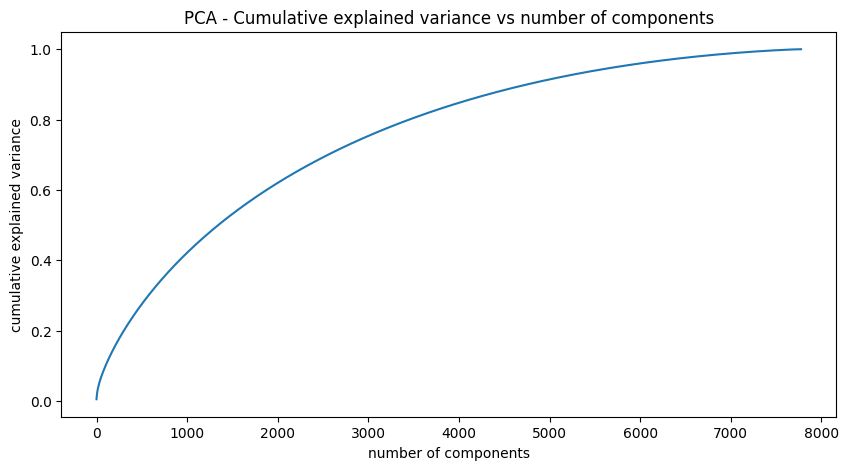

In [74]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

* We find that 100% of the variance is explained by about ~7500 components.
* Also, more than 80% of the variance is explained just by 4000 components.
* Hence to simplify the model, and reduce dimensionality, we can take the top 4000 components, which will still be able to capture more than 80% of variance.

In [75]:
# reducing the dimensions to 4000 using pca
pca = PCA(n_components=4000,random_state=42)
pca.fit(X)

PCA(n_components=4000, random_state=42)

In [76]:
# transformed features
x_pca = pca.transform(X)

In [77]:
# transformed features
x_pca.shape

(7777, 4000)

# ***7. Clustering Implementation***

## 7.1. K-Means Clustering:

Visualizing the elbow curve and Silhouette score to decide on the optimal number of clusters for K-means clustering algorithm.

Text(0, 0.5, 'WCSS')

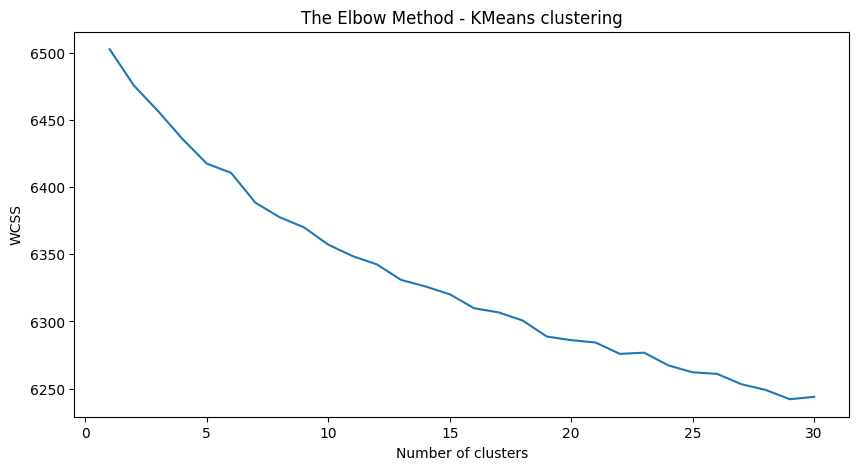

In [78]:
# Elbow method to find the optimal value of k
wcss=[]
for i in range(1,31):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,31)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

**The sum of squared distance between each point and the centroid in a cluster (WCSS) decreases with the increase in the number of clusters.**

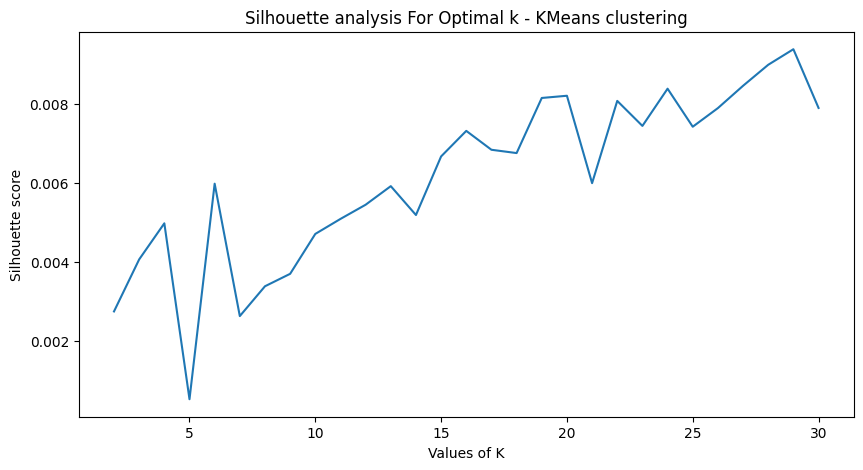

In [79]:
# Plotting Silhouette score for different umber of clusters
range_n_clusters = range(2,31)
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialize kmeans
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  cluster_labels = kmeans.labels_
 
  # silhouette score
  silhouette_avg.append(silhouette_score(x_pca, cluster_labels))

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

* The highest Silhouette score is obtained for 6 clusters.

In [80]:
# Clustering the data into 19 clusters
kmeans = KMeans(n_clusters=6,init='k-means++',random_state=33)
kmeans.fit(x_pca)

KMeans(n_clusters=6, random_state=33)

In [81]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(x_pca, kmeans.labels_)

print((kmeans_distortion,kmeans_silhouette_score))

(6410.701643175998, 0.0059825670473972305)


In [82]:
# Adding a kmeans cluster number attribute
df1['kmeans_cluster'] = kmeans.labels_

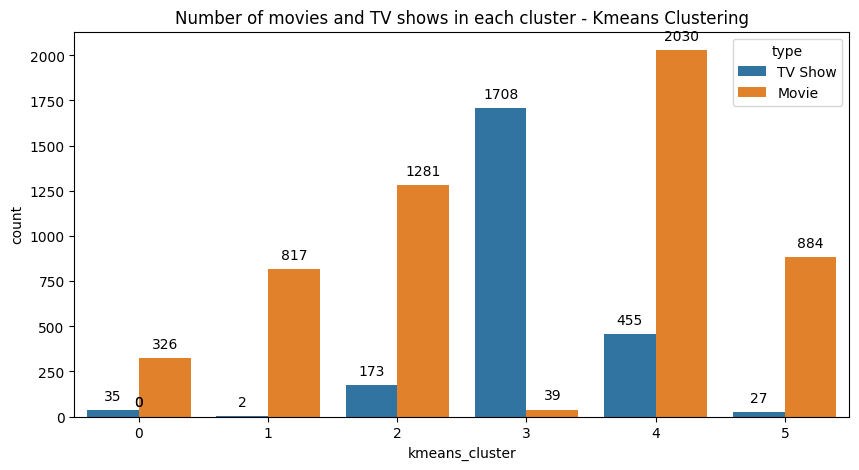

In [83]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='kmeans_cluster',data=df1, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

### 7.1.1. Building wordclouds for different clusters built:

In [84]:
# Building a wordcloud for the movie descriptions
def kmeans_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in df1[df1['kmeans_cluster']==cluster_num].description.values:
      
      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()
      
      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
      
      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)


  # plot the WordCloud image                      
  plt.figure(figsize = (10,5), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

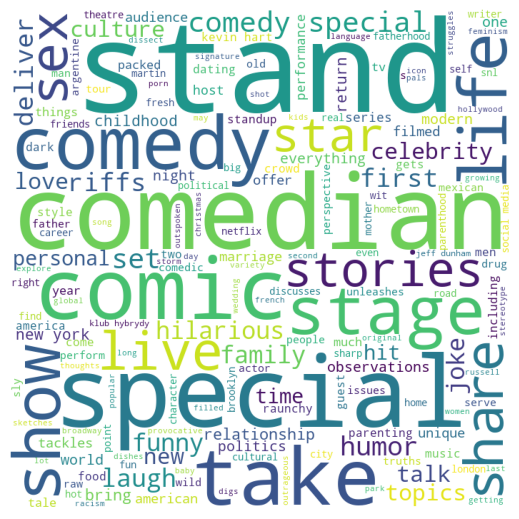

In [85]:
# Wordcloud for cluster 0
kmeans_worldcloud(0)

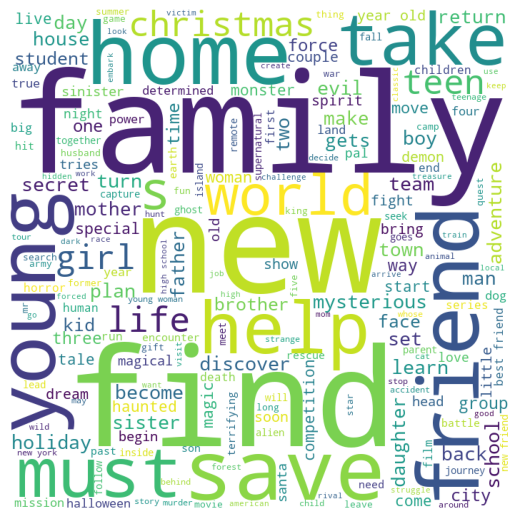

In [86]:
# Wordcloud for cluster 1
kmeans_worldcloud(1)

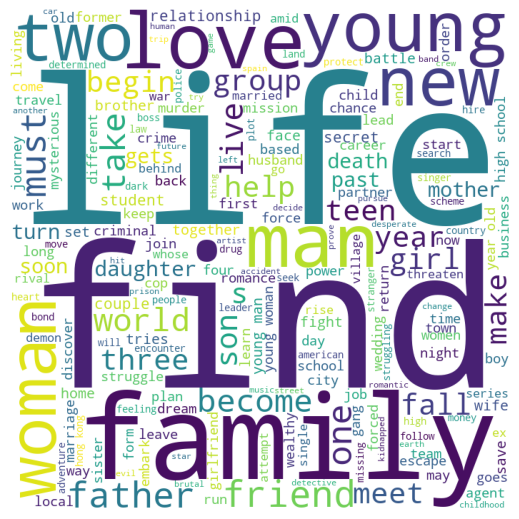

In [87]:
# Wordcloud for cluster 2
kmeans_worldcloud(2)

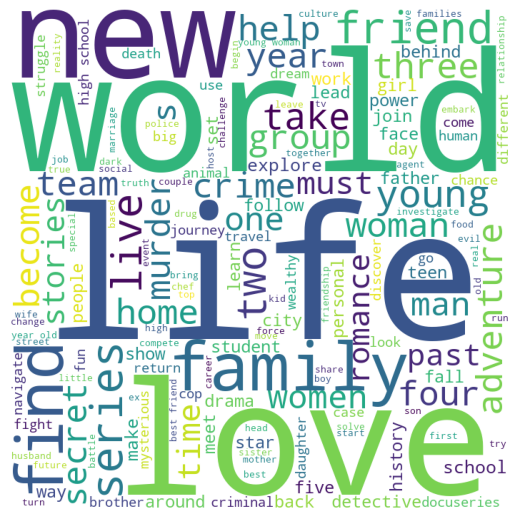

In [88]:
# Wordcloud for cluster 3
kmeans_worldcloud(3)

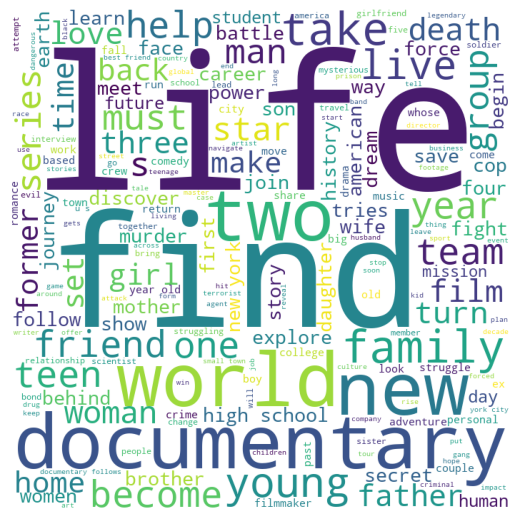

In [89]:
# Wordcloud for cluster 4
kmeans_worldcloud(4)

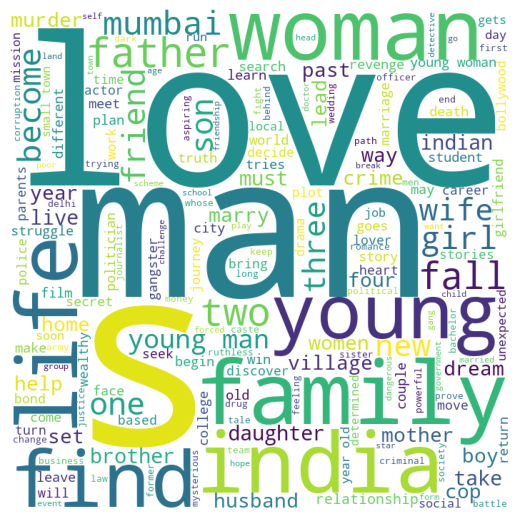

In [90]:
# Wordcloud for cluster 5
kmeans_worldcloud(5)

## 7.2. Hierarchical clustering

Visualizing the dendrogram to decide on the optimal number of clusters for the agglomerative (hierarchical) clustering algorithm:

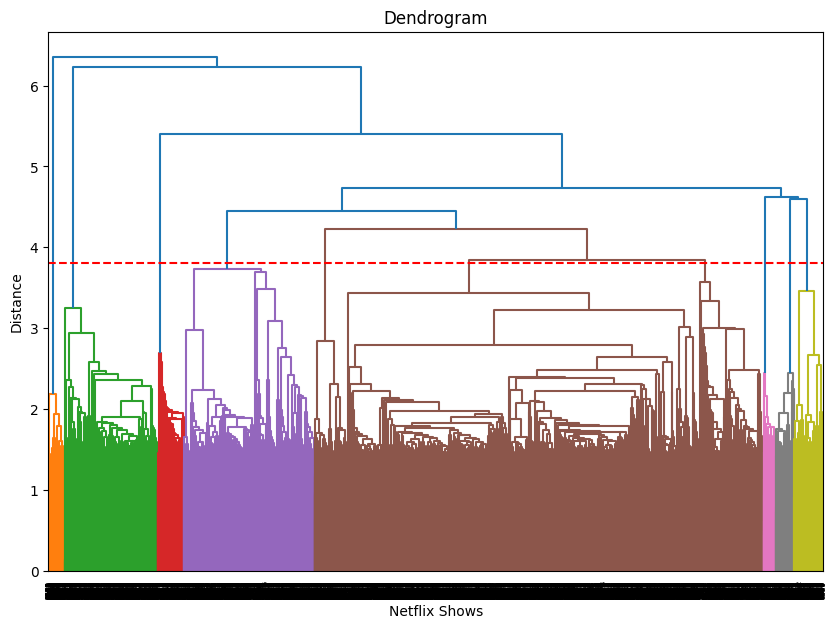

In [93]:
# Building a dendogram to decide on the number of clusters
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
dend = shc.dendrogram(shc.linkage(x_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 3.8, color='r', linestyle='--')

**At a distance of 3.8 units, 12 clusters can be built using the agglomerative clustering algorithm.**

In [133]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')  
hierarchical_labels = hierarchical.fit_predict(x_pca)  

In [134]:
# Adding a cluster number attribute
df1['hierarchical_cluster'] = hierarchical.labels_

In [135]:
# Silhouette Score calculation
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(x_pca, hierarchical_labels)
print(f'Silhouette Score (Hierarchical): {silhouette_avg:.4f}')

Silhouette Score (Hierarchical): 0.0011


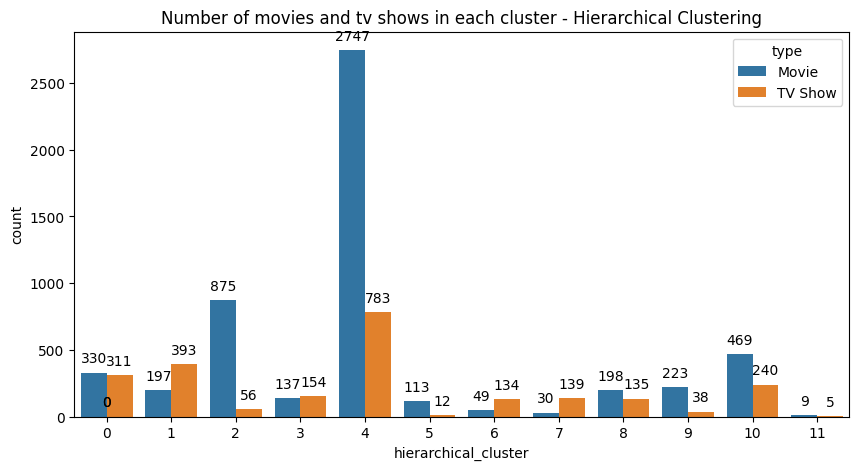

In [136]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='hierarchical_cluster',data=df1, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

### 7.2.1. Building wordclouds for different clusters built:

In [137]:
# Building a wordcloud for the movie descriptions
def hierarchical_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in df1[df1['hierarchical_cluster']==cluster_num].description.values:
      
      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()
      
      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
      
      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)


  # plot the WordCloud image                      
  plt.figure(figsize = (10,5), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

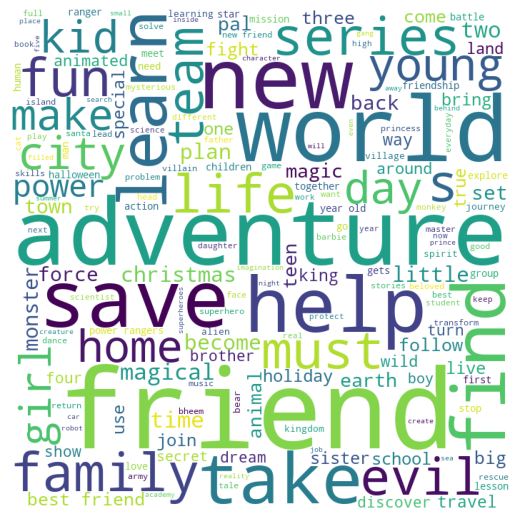

In [138]:
# Wordcloud for cluster 0
hierarchical_worldcloud(0)

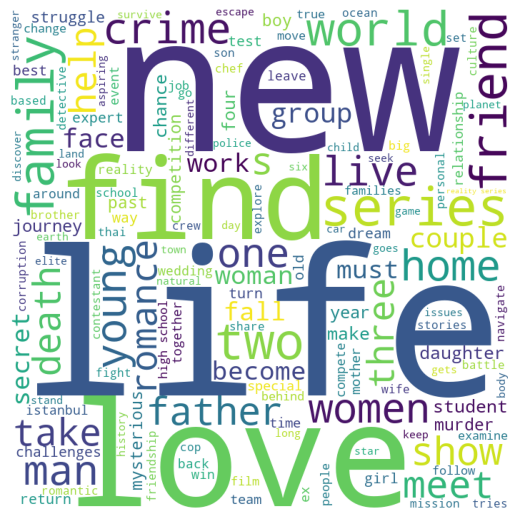

In [139]:
# Wordcloud for cluster 1
hierarchical_worldcloud(1)

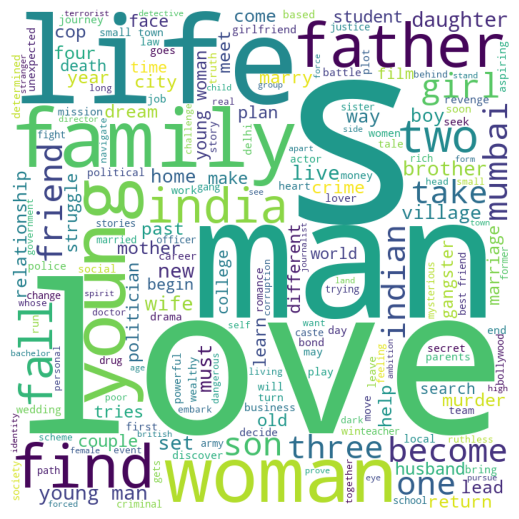

In [140]:
# Wordcloud for cluster 2
hierarchical_worldcloud(2)

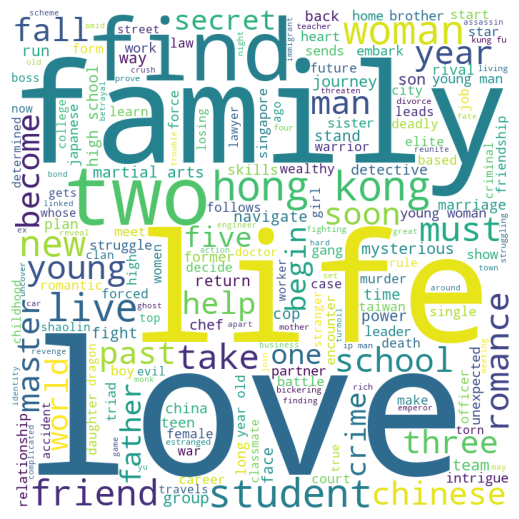

In [141]:
# Wordcloud for cluster 3
hierarchical_worldcloud(3)

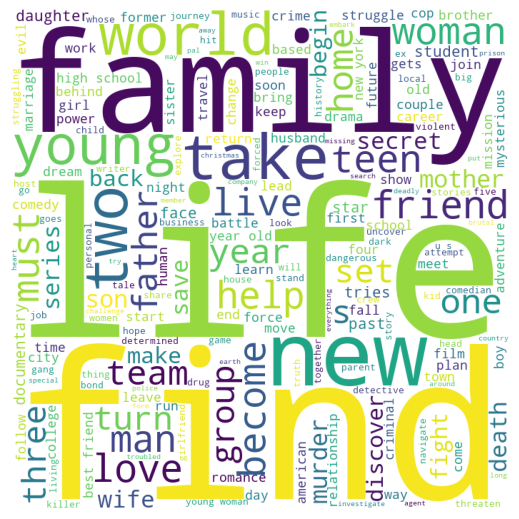

In [142]:
# Wordcloud for cluster 4
hierarchical_worldcloud(4)

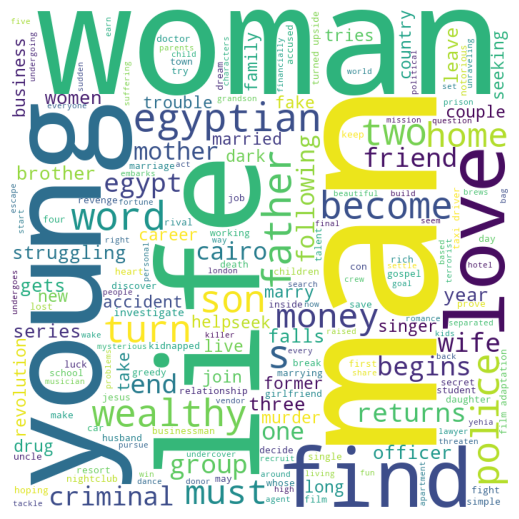

In [143]:
# Wordcloud for cluster 5
hierarchical_worldcloud(5)

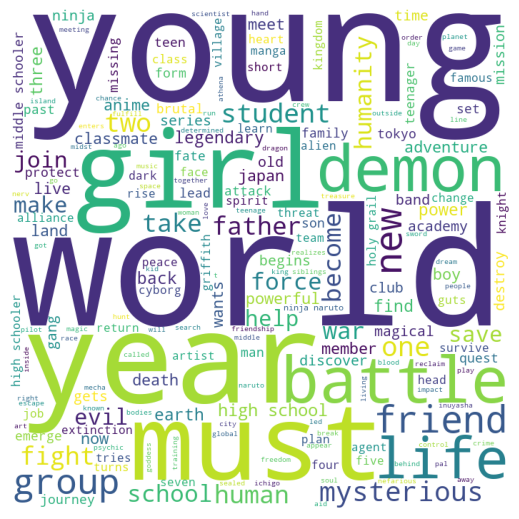

In [144]:
# Wordcloud for cluster 6
hierarchical_worldcloud(6)

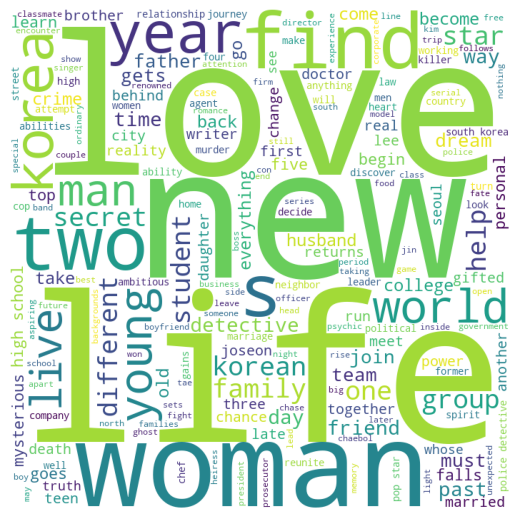

In [145]:
# Wordcloud for cluster 7
hierarchical_worldcloud(7)

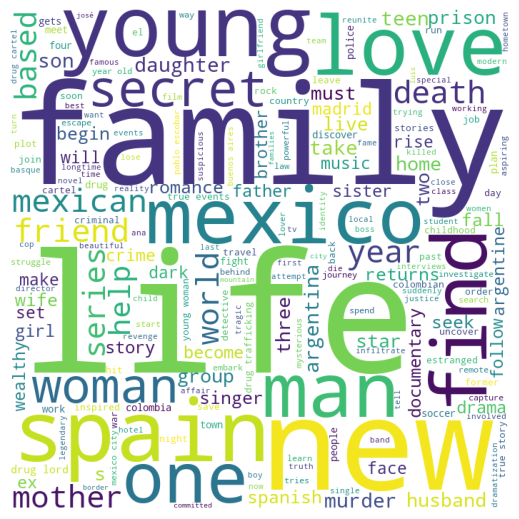

In [146]:
# Wordcloud for cluster 8
hierarchical_worldcloud(8)

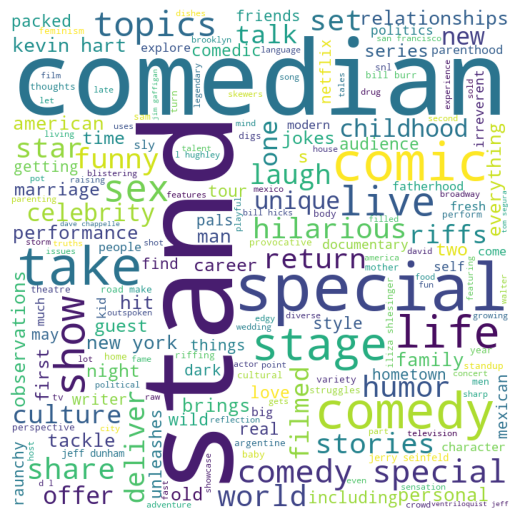

In [147]:
# Wordcloud for cluster 9
hierarchical_worldcloud(9)

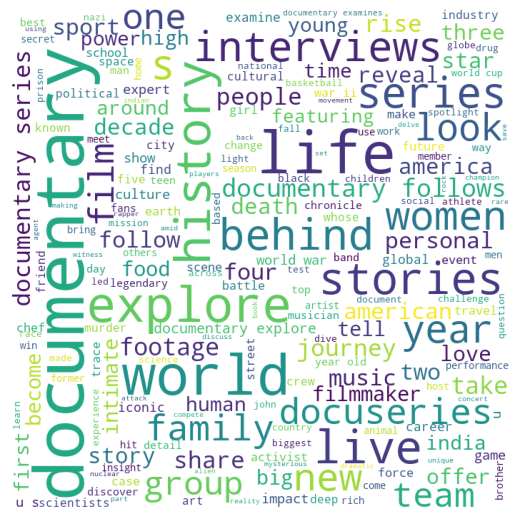

In [148]:
# Wordcloud for cluster 10
hierarchical_worldcloud(10)

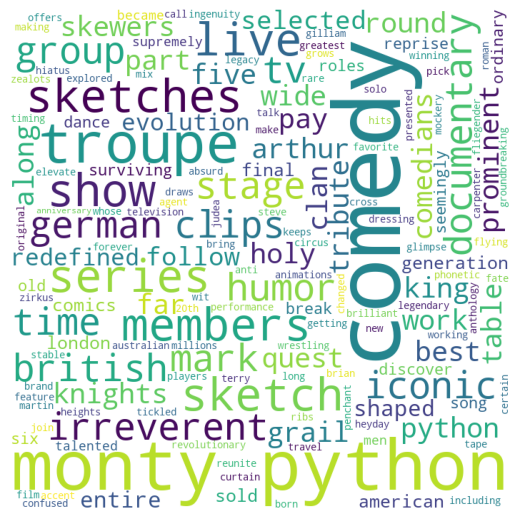

In [149]:
# Wordcloud for cluster 11
hierarchical_worldcloud(11)

## 7.3 DBSCAN Clustering

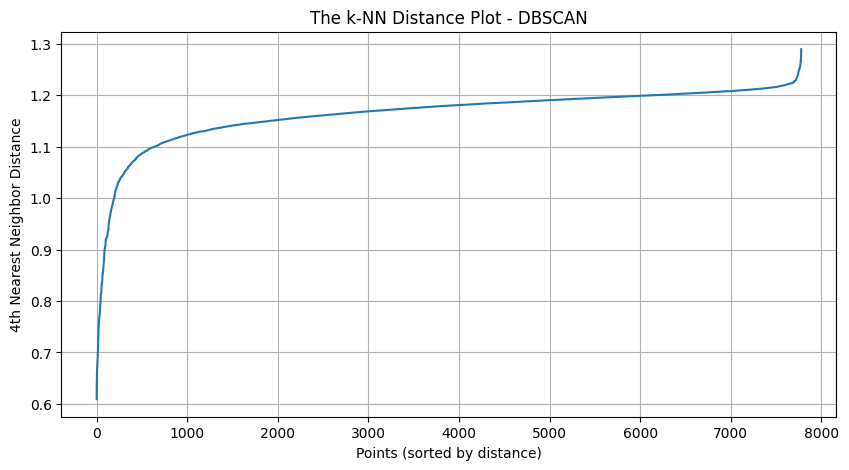

In [150]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(x_pca)
distances, indices = neighbors_fit.kneighbors(x_pca)

# Sort and plot the k-distance
distances = np.sort(distances[:, 4])
plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.title('The k-NN Distance Plot - DBSCAN')
plt.xlabel('Points (sorted by distance)')
plt.ylabel('4th Nearest Neighbor Distance')
plt.grid(True)
plt.show()


In [151]:
# Building clusters using DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)  # Tune eps if needed
dbscan.fit(x_pca)

# Add the cluster labels to the DataFrame
df1['dbscan_cluster'] = dbscan.labels_


In [152]:
# Silhouette Score calculation
labels = dbscan.labels_
if len(set(labels)) > 1 and -1 in labels:
    dbscan_silhouette = silhouette_score(x_pca[labels != -1], labels[labels != -1])
elif len(set(labels)) > 1:
    dbscan_silhouette = silhouette_score(x_pca, labels)
else:
    dbscan_silhouette = -1  # Only one cluster or all noise

print(f"Silhouette Score (DBSCAN): {dbscan_silhouette:.4f}")


Silhouette Score (DBSCAN): -1.0000


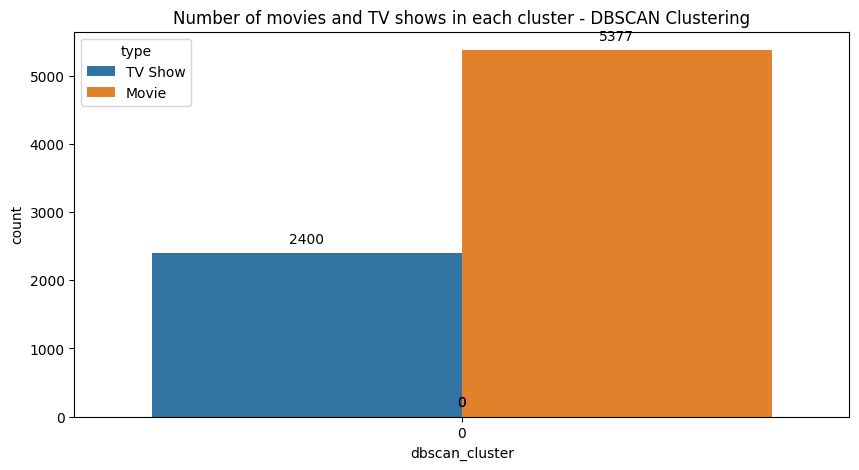

In [153]:
#Plotting the bar chart to display clusters of type
plt.figure(figsize=(10,5))
q = sns.countplot(x='dbscan_cluster', data=df1, hue='type')
plt.title('Number of movies and TV shows in each cluster - DBSCAN Clustering')

for i in q.patches:
    q.annotate(format(i.get_height(), '.0f'),
               (i.get_x() + i.get_width() / 2., i.get_height()),
               ha='center', va='center', xytext=(0, 10),
               textcoords='offset points')


# ***8. Content based recommender system***

In [202]:
# defining a new df for building a recommender system
recommender_df = df1.copy()

In [203]:
# Changing the index of the df from show id to show title
recommender_df['show_id'] = recommender_df.index

In [204]:
# setting title of movies/Tv shows as index
recommender_df.set_index('title',inplace=True)

In [205]:
# Convert list-type entries to strings
recommender_df['clustering_attributes'] = recommender_df['clustering_attributes'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Now apply CountVectorizer
CV = CountVectorizer()
converted_matrix = CV.fit_transform(recommender_df['clustering_attributes'])


In [206]:
# Cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity = cosine_similarity(converted_matrix)

In [207]:
cosine_similarity.shape

(7777, 7777)

In [208]:
# Developing a function to get 10 recommendations for a show
indices = pd.Series(recommender_df.index)

def recommend(title, cosine_sim = cosine_similarity):
  try:
    recommend_content = []   
    idx = indices[indices == title].index[0]
    series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top10 = list(series.iloc[1:11].index)
    # list with the titles of the best 10 matching movies
    for i in top10:
      recommend_content.append(list(recommender_df.index)[i])
    print("If you liked '"+title+"', you may also enjoy:\n")
    return recommend_content

  except:
    return 'Invalid Entry'

In [209]:
# Recommendations for 'A Man Called God'
recommend('A Man Called God')

If you liked 'A Man Called God', you may also enjoy:



['One Spring Night',
 'Mr. Sunshine',
 'Rugal',
 'The King: Eternal Monarch',
 'My Mister',
 'Illang: The Wolf Brigade',
 'Extracurricular',
 'The Lies Within',
 'Reply 1994',
 'Private Lives']

In [210]:
# Recommendations for 'Stranger Things'
recommend('Stranger Things')

If you liked 'Stranger Things', you may also enjoy:



['Beyond Stranger Things',
 'Tread',
 'Prank Encounters',
 'Zombie Dumb',
 'Kiss Me First',
 'Henry Danger',
 'Haunted',
 'Living Undocumented',
 'Drug Lords',
 'Shopkins']

In [211]:
# Recommendations for 'Peaky Blinders'
recommend('Peaky Blinders')

If you liked 'Peaky Blinders', you may also enjoy:



['Rebellion',
 'The Blue Planet: A Natural History of the Oceans',
 'Mega Food',
 'Botched Up Bodies',
 'I AM A KILLER: RELEASED',
 'The Murder Detectives',
 'The Hunt',
 'Inside The Freemasons',
 'Happy Valley',
 'The Making of Frozen Planet']

In [212]:
# Recommendations for 'Lucifer'
recommend('Lucifer')

If you liked 'Lucifer', you may also enjoy:



['Rica, Famosa, Latina',
 'Exhibit A',
 'Women Behind Bars',
 'Trial By Media',
 'Inside the Criminal Mind',
 'Cold Case Files',
 'Trial 4',
 'The Confession Tapes',
 'Terrorism Close Calls',
 'The Keepers']

In [213]:
# Recommendations for 'XX'
recommend('XX')

If you liked 'XX', you may also enjoy:



['The Invitation',
 'I Am the Pretty Thing That Lives in the House',
 'Tales From the Hood 2',
 'The Day of the Lord',
 '1st Summoning',
 'Phobia 2',
 "Devil's Gate",
 'The Silence',
 'Darna Mana Hai',
 'Ragini MMS 2']

In [222]:
import joblib

# Save CountVectorizer and cosine similarity
joblib.dump(CV, "countvectorizer.pkl")
joblib.dump(cosine_similarity, "cosine_similarity.pkl")

# Save recommender_df index (titles) to use during recommendation
recommender_df[['clustering_attributes']].to_pickle("recommender_df.pkl")


In [223]:
import joblib
import pandas as pd
# Load saved models
CV = joblib.load("countvectorizer.pkl")
cosine_similarity = joblib.load("cosine_similarity.pkl")
recommender_df = pd.read_pickle("recommender_df.pkl")

# Set index
recommender_df.reset_index(inplace=True)
recommender_df.set_index('title', inplace=True)

# Get titles (index)
indices = pd.Series(recommender_df.index)

# Recommend function
def recommend_10(title, cosine_sim=cosine_similarity):
    try:
        recommend_content = []
        idx = indices[indices == title].index[0]
        series = pd.Series(cosine_sim[idx]).sort_values(ascending=False)
        top10 = list(series.iloc[1:11].index)
        for i in top10:
            recommend_content.append(list(recommender_df.index)[i])
        print(f"\nIf you liked '{title}', you may also enjoy:\n")
        return recommend_content
    except:
        return "Invalid Entry"

In [227]:
recommend_10('3 Idiots')


If you liked '3 Idiots', you may also enjoy:



['PK',
 'Ek Main Aur Ekk Tu',
 'No Entry',
 'Rang De Basanti',
 'Dil Chahta Hai',
 'War Chhod Na Yaar',
 'Sanju',
 'Khushi',
 'Andaz Apna Apna',
 'College Romance']

# **Conclusion**

* Several clustering candidates such as KMeans, Hierarchical Clustering, and DBScan were experimented with to separate Netflix shows on the basis of metadata and textual characteristics.
* Regular NLP preprocessing was used to display descriptions and other attributes that are text-related, such as tokenization, payoffs, lemmatization, TF-IDF vectorization, and dimensionality reduction through PCA.
* Cosine similarity was used to come up with a Content-Based Recommendation System that gave individualized recommendations on the shows to watch depending on textual similarities between textual data entered by the user and other shows.
* Although a hybrid recommendation methods were originally contemplated, it was experimentally disregarded as it yielded inferior results and did not apply to the peculiarities of the data.
* It was chosen as a matter of fact that content-based approach was more accurate in relation to the recommendation, it is relevant and there is much textual metadata incorporated.
* Even without ratings, which were lacking in the dataset, the system will make the recommendations understandable and specific to an individual.
* The use of clustering was left as an effective analysis process to gain some insights on how genreness is distributed and to determine trends in the contents of genres across Netflix offerings.
* The overall model shows how machine learning can efficiently be used to unarguably team up with NLP to enable smart recommendation systems on a case-by-case basis primarily with or without the sufficiently rich user feedback.
* The project has a practical scope since it takes into consideration the problem of data sparsity in addition to proposing insightful/user-relevant recommendations within a streaming platform framework.
* Further improvements might be performed with time feature integration or sentiment-aware modeling to make the content suggestions more accurate.